# 1.Understanding the Data:

Import necessary libraries (e.g., pandas, matplotlib, seaborn).<br>
Load the COVID-19 dataset.<br>
Display basic information about the dataset (e.g., data types, missing values).<br>

In [2]:
# load required libraries/modules

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

df=pd.read_csv(r"C:\Users\ADMIN\Downloads\covid_19_data.csv")
df

# Load the dataset


# Display basic information about the dataset

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [3]:
df.shape

(306429, 8)

In [4]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [5]:
df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [6]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

# 2. Data Cleaning:

In [8]:
# Handle missing values
df.dropna(inplace=True)

# Convert data types if necessary
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


In [9]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [10]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


In [11]:
confirmed_cases = df.drop(['Deaths', 'Recovered'],axis=1)
confirmed_cases = confirmed_cases[confirmed_cases['Confirmed'] != 0]
confirmed_cases.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0
5,6,2020-01-22,Guangdong,Mainland China,1/22/2020 17:00,26.0


In [12]:
Deaths_cases = df.drop(['Confirmed', 'Recovered'],axis=1)
Deaths_cases = Deaths_cases[Deaths_cases['Deaths'] != 0]
Deaths_cases.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Deaths
13,14,2020-01-22,Hubei,Mainland China,1/22/2020 17:00,17.0
49,50,2020-01-23,Hubei,Mainland China,1/23/20 17:00,17.0
53,54,2020-01-23,Hubei,Mainland China,1/23/20 17:00,17.0
88,89,2020-01-24,Hubei,Mainland China,1/24/20 17:00,24.0
107,108,2020-01-24,Heilongjiang,Mainland China,1/24/20 17:00,1.0


In [13]:
Recovered_cases = df.drop(['Confirmed', 'Deaths'],axis=1)
Recovered_cases = Recovered_cases[Recovered_cases['Recovered'] != 0]
Recovered_cases.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Recovered
13,14,2020-01-22,Hubei,Mainland China,1/22/2020 17:00,28.0
45,46,2020-01-23,Guangdong,Mainland China,1/23/20 17:00,2.0
49,50,2020-01-23,Hubei,Mainland China,1/23/20 17:00,28.0
53,54,2020-01-23,Hubei,Mainland China,1/23/20 17:00,28.0
88,89,2020-01-24,Hubei,Mainland China,1/24/20 17:00,31.0


In [14]:
for i in df.columns:
    if df[i].dtypes == "object":
        m=df[i].mode()[0]
        df[i]=df[i].fillna(m)
    else:
        avg=df[i].mean()
        df[i]=df[i].fillna(avg)

In [ ]:
# Handle missing values
#df.isna().count()


# Convert data types if necessary ( ObservationDate    datetime64[ns]) change to datetime

# df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Check for duplicates
# print("Number of duplicates:", df.duplicated().sum())


In [15]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


# 3. Descriptive Statistics:

Generate descriptive statistics (mean, median, min, max) for numeric columns.<br>
Explore summary statistics for categorical columns.

In [16]:
# Descriptive statistics
df.describe()

,SNo,ObservationDate,Confirmed,Deaths,Recovered
count,228326.000000,228326,2.283260e+05,228326.000000,2.283260e+05
mean,158732.777113,2020-11-14 03:17:45.686780928,8.021381e+04,1961.373273,4.184345e+04
min,1.000000,2020-01-22 00:00:00,-3.028440e+05,-178.000000,-8.544050e+05
25%,85431.250000,2020-08-11 00:00:00,1.225000e+03,15.000000,0.000000e+00
50%,159305.500000,2020-11-18 00:00:00,1.175750e+04,234.000000,1.211000e+03
75%,232835.750000,2021-02-22 00:00:00,4.841125e+04,1411.000000,1.660275e+04
max,306429.000000,2021-05-29 00:00:00,5.713215e+06,112385.000000,6.399531e+06
std,85862.065298,NaN,2.493661e+05,5871.937048,1.793670e+05


In [17]:
# Summary statistics for categorical columns

print(df['Country/Region'].value_counts())

Country/Region
Russia            30129
US                26740
Japan             17932
Mainland China    15758
India             13050
Colombia          12419
Mexico            12199
Brazil            10144
Ukraine            9801
Peru               9542
Italy              8001
Spain              7615
Sweden             7539
Canada             6960
UK                 6553
Germany            6481
Chile              6375
Netherlands        5864
France             4544
Australia          3785
Pakistan           2478
Belgium            2388
Denmark             893
Hong Kong           494
Macau               494
Taiwan               49
China                48
Others               46
Israel                5
Name: count, dtype: int64


In [18]:
# Descriptive statistics
df.columns

# Summary statistics for categorical columns



Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [19]:
cat=[]
con=[]

for i in df:
    if df[i].dtypes =="object":
        cat.append(i)
    else:
        con.append(i)

In [20]:
print(cat)

['Province/State', 'Country/Region', 'Last Update']


In [21]:
print(con)

['SNo', 'ObservationDate', 'Confirmed', 'Deaths', 'Recovered']


# 4. Time Series Analysis:

Analyze the trends in confirmed, deaths, and recovered cases over time.<br>
Create time-based visualizations.

In [ ]:
# Time series analysis
# groupby 'ObservationDate' and apply aggregation functions like sum on deaths,confirmed ,recovered 
# df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot time series data using line plot

# syntax: 
#sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
# sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')




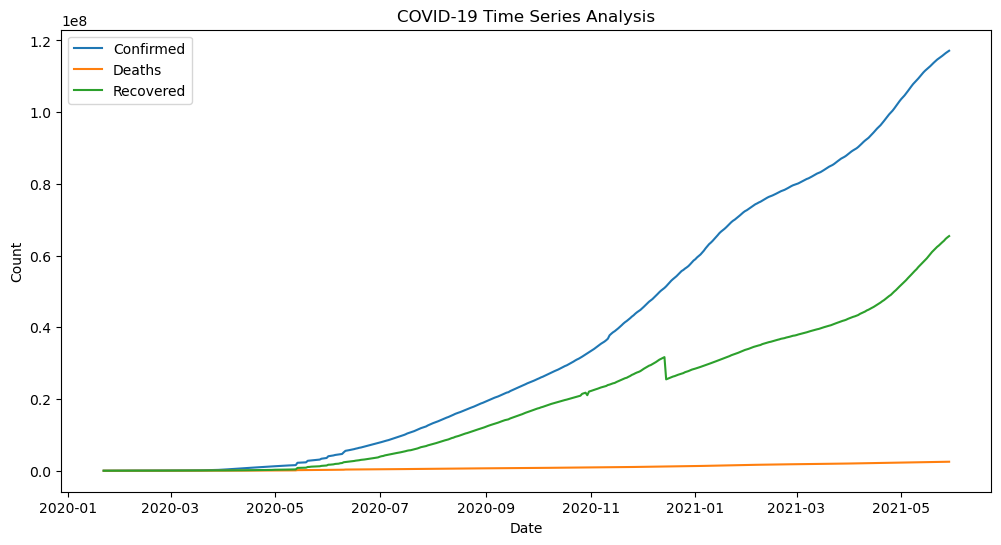

In [22]:
# Time series analysis
df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot time series data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')
sns.lineplot(data=df_time, x='ObservationDate', y='Recovered', label='Recovered')
plt.title('COVID-19 Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [23]:
df.groupby(by='ObservationDate').max()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,39,Zhejiang,US,1/22/2020 17:00,444.0,17.0,28.0
2020-01-23,87,Zhejiang,US,1/23/20 17:00,444.0,17.0,28.0
2020-01-24,130,Zhejiang,US,1/24/20 17:00,549.0,24.0,31.0
2020-01-25,176,Zhejiang,US,1/25/20 17:00,761.0,40.0,32.0
2020-01-26,225,Zhejiang,US,1/26/20 16:00,1058.0,52.0,42.0
...,...,...,...,...,...,...,...
2021-05-25,303369,Zuid-Holland,Ukraine,2021-05-26 04:20:35,5626155.0,112355.0,5218768.0
2021-05-26,304134,Zuid-Holland,Ukraine,2021-05-27 04:20:59,5650907.0,112363.0,5241833.0
2021-05-27,304899,Zuid-Holland,Ukraine,2021-05-28 04:20:36,5672180.0,112371.0,5276203.0


In [24]:
df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,550.0,17.0,28.0
2020-01-23,1088.0,34.0,58.0
2020-01-24,925.0,26.0,36.0
2020-01-25,1411.0,42.0,39.0
2020-01-26,2085.0,56.0,49.0
...,...,...,...
2021-05-25,115693206.0,2470982.0,63714612.0
2021-05-26,116092305.0,2480596.0,64130135.0
2021-05-27,116466022.0,2490458.0,64673366.0


# 5. Geographical Analysis:

Analyze the distribution of cases across different countries/regions.<br>
Create geographical visualizations (e.g., world map).

In [ ]:
# Geographical analysis
# df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot geographical data
# sns.barplot(x=df_country.index, y='Confirmed', data=df_country)



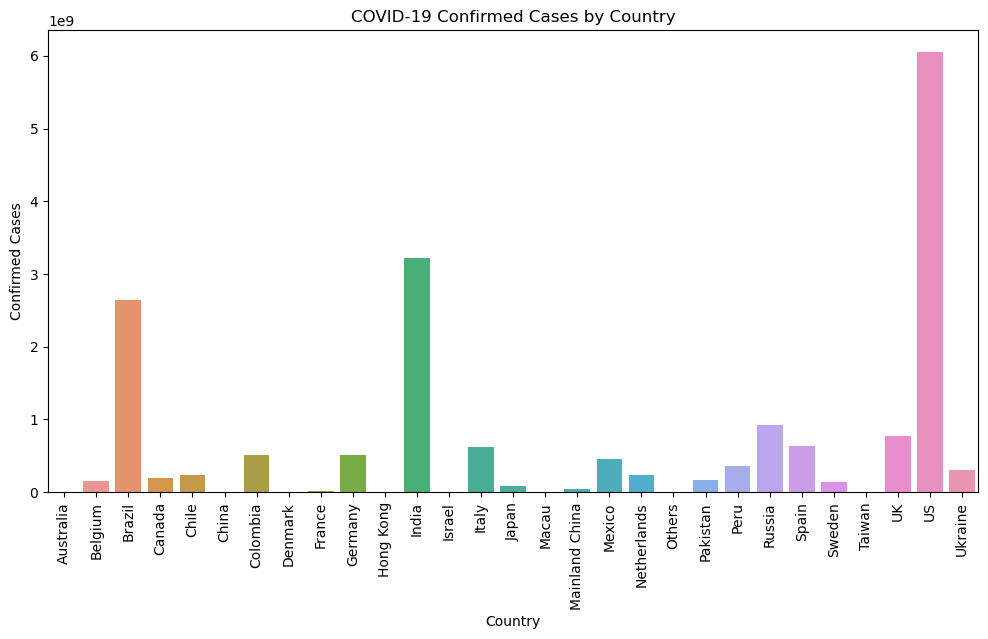

In [25]:
# Geographical analysis
df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum','Deaths':'sum','Recovered':'sum'})

# Plot geographical data
plt.figure(figsize=(12, 6))
sns.barplot(x=df_country.index, y='Confirmed', data=df_country)
plt.title('COVID-19 Confirmed Cases by Country')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90, ha='center')
plt.show()

In [ ]:
#df_country = cdata.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
#df_country

# 6. Correlation Analysis:

Examine the correlation between different numeric variables.

In [27]:
# Correlation analysis between confirmed,deaths and recovered

# Plot correlation on heat map

ht=df[['Confirmed','Deaths','Recovered']].corr()
ht

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.881104,0.498839
Deaths,0.881104,1.000000,0.421545
Recovered,0.498839,0.421545,1.000000


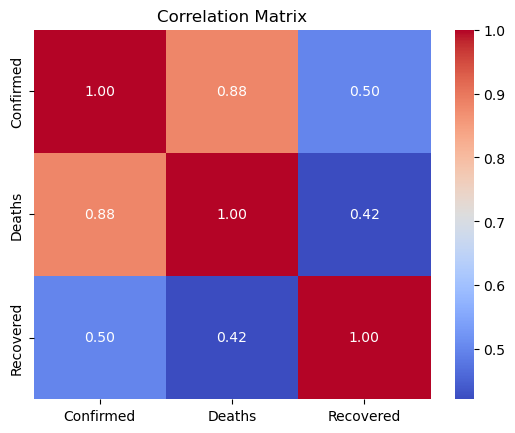

In [28]:
# Correlation analysis
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 7. Advanced Analysis:

Explore advanced visualizations or statistical tests based on the specific questions you want to answer.

In [29]:
# Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.
Confirmedcases=df['Confirmed'].sum()
print("confirmed cases are ", Confirmedcases)

Deaths=df['Deaths'].sum()
print("Deaths ", Deaths)

Recovered=df['Recovered'].sum()
print("Recoveries ", Recovered)

confirmed cases are  18314899026.0
Deaths  447832514.0
Recoveries  9553947245.0
